# Libraries

In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kruskal, wilcoxon, mannwhitneyu,false_discovery_control

# Data Cleaning

In [3]:
data = pl.read_excel("results1.xlsx")
data2 = pl.read_excel("results2.xlsx")

In [4]:
data = pl.read_excel("results_25.xlsx")
data2 = pl.read_excel("results_25bis.xlsx")

In [5]:
data.columns

['ID risposta',
 'Data invio',
 'Ultima pagina',
 'Lingua iniziale',
 'Seme',
 'Data di inizio',
 "Data dell'ultim.. ",
 'TASK 1',
 'TEAM 1        T.. ',
 'Please, provide..  [How\xa0correct\xa0do .. ][]',
 'Please, provide..  [\xa0 How well do y.. ][]',
 'Please, provide..  [\xa0 How would you.. ][]',
 'Please, provide..  [\xa0 How confident.. ][]',
 'Short answer: a.. ',
 'Please, provide..  [How\xa0correct\xa0do .. ][]_1',
 'Please, provide..  [\xa0 How well do y.. ][]_1',
 'Please, provide..  [\xa0 How would you.. ][]_1',
 'Please, provide..  [\xa0 How confident.. ][]_1',
 "TEAM 3  I'd be .. ",
 'Please, provide..  [How\xa0correct\xa0do .. ][]_2',
 'Please, provide..  [\xa0 How well do y.. ][]_2',
 'Please, provide..  [\xa0 How would you.. ][]_2',
 'Please, provide..  [\xa0 How confident.. ][]_2',
 'TASK 2',
 'Given that the .. ',
 'Please, provide..  [How\xa0correct\xa0do .. ][]_3',
 'Please, provide..  [\xa0 How well do y.. ][]_3',
 'Please, provide..  [\xa0 How would you.. ][]_3

In [6]:
data2.columns

['ID risposta',
 'Data invio',
 'Ultima pagina',
 'Lingua iniziale',
 'Seme',
 'Data di inizio',
 "Data dell'ultim.. ",
 'TASK 1',
 'TEAM 1        T.. ',
 'Please, provide..  [How\xa0correct\xa0do .. ][]',
 'Please, provide..  [\xa0 How well do y.. ][]',
 'Please, provide..  [\xa0 How would you.. ][]',
 'Please, provide..  [\xa0 How confident.. ][]',
 'Short answer: a.. ',
 'Please, provide..  [How\xa0correct\xa0do .. ][]_1',
 'Please, provide..  [\xa0 How well do y.. ][]_1',
 'Please, provide..  [\xa0 How would you.. ][]_1',
 'Please, provide..  [\xa0 How confident.. ][]_1',
 "TEAM 3  I'd be .. ",
 'Please, provide..  [How\xa0correct\xa0do .. ][]_2',
 'Please, provide..  [\xa0 How well do y.. ][]_2',
 'Please, provide..  [\xa0 How would you.. ][]_2',
 'Please, provide..  [\xa0 How confident.. ][]_2',
 'TASK 2',
 'Given that the .. ',
 'Please, provide..  [How\xa0correct\xa0do .. ][]_3',
 'Please, provide..  [\xa0 How well do y.. ][]_3',
 'Please, provide..  [\xa0 How would you.. ][]_3

In [7]:
data = pl.concat([data, data2])

In [8]:
data.head()

ID risposta,Data invio,Ultima pagina,Lingua iniziale,Seme,Data di inizio,Data dell'ultim..,TASK 1,TEAM 1 T..,"Please, provide.. [How correct do .. ][]","Please, provide.. [ How well do y.. ][]","Please, provide.. [ How would you.. ][]","Please, provide.. [ How confident.. ][]",Short answer: a..,"Please, provide.. [How correct do .. ][]_1","Please, provide.. [ How well do y.. ][]_1","Please, provide.. [ How would you.. ][]_1","Please, provide.. [ How confident.. ][]_1",TEAM 3 I'd be ..,"Please, provide.. [How correct do .. ][]_2","Please, provide.. [ How well do y.. ][]_2","Please, provide.. [ How would you.. ][]_2","Please, provide.. [ How confident.. ][]_2",TASK 2,Given that the ..,"Please, provide.. [How correct do .. ][]_3","Please, provide.. [ How well do y.. ][]_3","Please, provide.. [ How would you.. ][]_3","Please, provide.. [ How confident.. ][]_3",Answer: Approxi..,"Please, provide.. [How correct do .. ][]_4","Please, provide.. [ How well do y.. ][]_4","Please, provide.. [ How would you.. ][]_4","Please, provide.. [ How confident.. ][]_4",I'll provide an..,"Please, provide.. [How correct do .. ][]_5","Please, provide.. [ How well do y.. ][]_5",…,To answer how t..,"Please, provide.. [How correct do .. ][]_8","Please, provide.. [ How well do y.. ][]_8","Please, provide.. [ How would you.. ][]_8","Please, provide.. [ How confident.. ][]_8",TASK 4,Based on the an..,"Please, provide.. [How correct do .. ][]_9","Please, provide.. [ How well do y.. ][]_9","Please, provide.. [ How would you.. ][]_9","Please, provide.. [ How confident.. ][]_9","Yes. A mild, lo..","Please, provide.. [How correct do .. ][]_10","Please, provide.. [ How well do y.. ][]_10","Please, provide.. [ How would you.. ][]_10","Please, provide.. [ How confident.. ][]_10","Yes, I would sa..","Please, provide.. [How correct do .. ][]_11","Please, provide.. [ How well do y.. ][]_11","Please, provide.. [ How would you.. ][]_11","Please, provide.. [ How confident.. ][]_11",TASK 5,Based on the pr..,"Please, provide.. [How correct do .. ][]_12","Please, provide.. [ How well do y.. ][]_12","Please, provide.. [ How would you.. ][]_12","Please, provide.. [ How confident.. ][]_12",TEAM 2 Sho..,"Please, provide.. [How correct do .. ][]_13","Please, provide.. [ How well do y.. ][]_13","Please, provide.. [ How would you.. ][]_13","Please, provide.. [ How confident.. ][]_13","No, his risk av..","Please, provide.. [How correct do .. ][]_14","Please, provide.. [ How well do y.. ][]_14","Please, provide.. [ How would you.. ][]_14","Please, provide.. [ How confident.. ][]_14"
i64,str,i64,str,i64,str,str,null,null,i64,i64,i64,i64,null,i64,i64,i64,i64,null,i64,i64,i64,i64,null,null,i64,i64,i64,i64,null,i64,i64,i64,i64,null,i64,i64,…,null,i64,i64,i64,i64,null,null,i64,i64,i64,i64,null,i64,i64,i64,i64,null,i64,i64,i64,i64,null,null,i64,i64,i64,i64,null,i64,i64,i64,i64,null,i64,i64,i64,i64
10,"""2025-12-17 19:06:54""",5,"""it""",1749686994,"""2025-12-17 18:43:02""","""2025-12-17 19:06:54""",null,null,6,4,2,4,null,8,10,10,8,null,10,10,10,10,null,null,5,7,4,5,null,8,10,7,8,null,9,10,…,null,10,10,10,10,null,null,8,6,3,6,null,9,9,8,10,null,10,10,10,10,null,null,6,7,2,3,null,7,8,8,8,null,10,10,10,10
25,"""2025-12-18 08:46:40""",5,"""it""",849410762,"""2025-12-18 08:40:07""","""2025-12-18 08:46:40""",null,null,6,8,7,2,null,6,7,7,2,null,7,8,8,2,null,null,5,8,7,6,null,5,7,7,2,null,5,6,…,null,3,7,7,3,null,null,6,8,7,3,null,6,7,7,3,null,6,7,7,3,null,null,4,6,6,3,null,5,6,7,2,null,6,6,6,3
37,"""2025-12-20 19:48:32""",5,"""it""",1779683950,"""2025-12-20 19:33:26""","""2025-12-20 19:48:32""",null,null,7,7,6,7,null,6,6,5,4,null,9,10,9,8,null,null,3,3,6,6,null,2,2,4,4,null,3,3,…,null,8,8,8,9,null,null,6,7,6,7,null,5,7,6,6,null,9,8,8,8,null,null,5,7,7,5,null,5,9,7,5,null,5,9,8,5
39,"""2025-12-21 18:28:19""",5,"""it""",1537436852,"""2025-12-21 18:18:19""","""2025-12-21 18:28:19""",null,null,6,6,7,4,null,6,8,4,3,null,8,10,10,7,null,null,6,7,6,6,null,5,6,4,4,null,8,8,…,null,8,9,10,8,null,null,6,8,7,

In [9]:
#task 1 team 1
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]": "REASONING_T1_1"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]": "CORRECTNESS_T1_1"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]": "ALIGNMENT_T1_1"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]": "CONFIDENT_T1_1"})

#task 1 team 2
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_1": "REASONING_T1_2"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_1": "CORRECTNESS_T1_2"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_1": "ALIGNMENT_T1_2"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_1": "CONFIDENT_T1_2"})

#task 1 team 1
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_2": "REASONING_T1_3"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_2": "CORRECTNESS_T1_3"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_2": "ALIGNMENT_T1_3"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_2": "CONFIDENT_T1_3"})

#task 2 team 1
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_3": "REASONING_T2_1"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_3": "CORRECTNESS_T2_1"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_3": "ALIGNMENT_T2_1"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_3": "CONFIDENT_T2_1"})

#task 2 team 2
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_4": "REASONING_T2_2"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_4": "CORRECTNESS_T2_2"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_4": "ALIGNMENT_T2_2"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_4": "CONFIDENT_T2_2"})

#task 2 team 3
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_5": "REASONING_T2_3"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_5": "CORRECTNESS_T2_3"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_5": "ALIGNMENT_T2_3"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_5": "CONFIDENT_T2_3"})

#task 3 team 1
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_6": "REASONING_T3_1"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_6": "CORRECTNESS_T3_1"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_6": "ALIGNMENT_T3_1"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_6": "CONFIDENT_T3_1"})

#task 3 team 2
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_7": "REASONING_T3_2"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_7": "CORRECTNESS_T3_2"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_7": "ALIGNMENT_T3_2"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_7": "CONFIDENT_T3_2"})

#task 3 team 3
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_8": "REASONING_T3_3"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_8": "CORRECTNESS_T3_3"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_8": "ALIGNMENT_T3_3"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_8": "CONFIDENT_T3_3"})

#task 4 team 1
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_9": "REASONING_T4_1"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_9": "CORRECTNESS_T4_1"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_9": "ALIGNMENT_T4_1"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_9": "CONFIDENT_T4_1"})

#task 4 team 2
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_10": "REASONING_T4_2"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_10": "CORRECTNESS_T4_2"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_10": "ALIGNMENT_T4_2"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_10": "CONFIDENT_T4_2"})

#task 4 team 3
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_11": "REASONING_T4_3"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_11": "CORRECTNESS_T4_3"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_11": "ALIGNMENT_T4_3"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_11": "CONFIDENT_T4_3"})


#task 5 team 1
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_12": "REASONING_T5_1"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_12": "CORRECTNESS_T5_1"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_12": "ALIGNMENT_T5_1"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_12": "CONFIDENT_T5_1"})

#task 5 team 2
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_13": "REASONING_T5_2"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_13": "CORRECTNESS_T5_2"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_13": "ALIGNMENT_T5_2"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_13": "CONFIDENT_T5_2"})

#task 5 team 3
data= data.rename({"Please, provide..  [\xa0 How would you.. ][]_14": "REASONING_T5_3"})
data = data.rename({"Please, provide..  [How\xa0correct\xa0do .. ][]_14": "CORRECTNESS_T5_3"})
data = data.rename({"Please, provide..  [\xa0 How well do y.. ][]_14": "ALIGNMENT_T5_3"})
data = data.rename({"Please, provide..  [\xa0 How confident.. ][]_14": "CONFIDENT_T5_3"})

In [10]:
data.head()

ID risposta,Data invio,Ultima pagina,Lingua iniziale,Seme,Data di inizio,Data dell'ultim..,TASK 1,TEAM 1 T..,CORRECTNESS_T1_1,ALIGNMENT_T1_1,REASONING_T1_1,CONFIDENT_T1_1,Short answer: a..,CORRECTNESS_T1_2,ALIGNMENT_T1_2,REASONING_T1_2,CONFIDENT_T1_2,TEAM 3 I'd be ..,CORRECTNESS_T1_3,ALIGNMENT_T1_3,REASONING_T1_3,CONFIDENT_T1_3,TASK 2,Given that the ..,CORRECTNESS_T2_1,ALIGNMENT_T2_1,REASONING_T2_1,CONFIDENT_T2_1,Answer: Approxi..,CORRECTNESS_T2_2,ALIGNMENT_T2_2,REASONING_T2_2,CONFIDENT_T2_2,I'll provide an..,CORRECTNESS_T2_3,ALIGNMENT_T2_3,…,To answer how t..,CORRECTNESS_T3_3,ALIGNMENT_T3_3,REASONING_T3_3,CONFIDENT_T3_3,TASK 4,Based on the an..,CORRECTNESS_T4_1,ALIGNMENT_T4_1,REASONING_T4_1,CONFIDENT_T4_1,"Yes. A mild, lo..",CORRECTNESS_T4_2,ALIGNMENT_T4_2,REASONING_T4_2,CONFIDENT_T4_2,"Yes, I would sa..",CORRECTNESS_T4_3,ALIGNMENT_T4_3,REASONING_T4_3,CONFIDENT_T4_3,TASK 5,Based on the pr..,CORRECTNESS_T5_1,ALIGNMENT_T5_1,REASONING_T5_1,CONFIDENT_T5_1,TEAM 2 Sho..,CORRECTNESS_T5_2,ALIGNMENT_T5_2,REASONING_T5_2,CONFIDENT_T5_2,"No, his risk av..",CORRECTNESS_T5_3,ALIGNMENT_T5_3,REASONING_T5_3,CONFIDENT_T5_3
i64,str,i64,str,i64,str,str,null,null,i64,i64,i64,i64,null,i64,i64,i64,i64,null,i64,i64,i64,i64,null,null,i64,i64,i64,i64,null,i64,i64,i64,i64,null,i64,i64,…,null,i64,i64,i64,i64,null,null,i64,i64,i64,i64,null,i64,i64,i64,i64,null,i64,i64,i64,i64,null,null,i64,i64,i64,i64,null,i64,i64,i64,i64,null,i64,i64,i64,i64
10,"""2025-12-17 19:06:54""",5,"""it""",1749686994,"""2025-12-17 18:43:02""","""2025-12-17 19:06:54""",null,null,6,4,2,4,null,8,10,10,8,null,10,10,10,10,null,null,5,7,4,5,null,8,10,7,8,null,9,10,…,null,10,10,10,10,null,null,8,6,3,6,null,9,9,8,10,null,10,10,10,10,null,null,6,7,2,3,null,7,8,8,8,null,10,10,10,10
25,"""2025-12-18 08:46:40""",5,"""it""",849410762,"""2025-12-18 08:40:07""","""2025-12-18 08:46:40""",null,null,6,8,7,2,null,6,7,7,2,null,7,8,8,2,null,null,5,8,7,6,null,5,7,7,2,null,5,6,…,null,3,7,7,3,null,null,6,8,7,3,null,6,7,7,3,null,6,7,7,3,null,null,4,6,6,3,null,5,6,7,2,null,6,6,6,3
37,"""2025-12-20 19:48:32""",5,"""it""",1779683950,"""2025-12-20 19:33:26""","""2025-12-20 19:48:32""",null,null,7,7,6,7,null,6,6,5,4,null,9,10,9,8,null,null,3,3,6,6,null,2,2,4,4,null,3,3,…,null,8,8,8,9,null,null,6,7,6,7,null,5,7,6,6,null,9,8,8,8,null,null,5,7,7,5,null,5,9,7,5,null,5,9,8,5
39,"""2025-12-21 18:28:19""",5,"""it""",1537436852,"""2025-12-21 18:18:19""","""2025-12-21 18:28:19""",null,null,6,6,7,4,null,6,8,4,3,null,8,10,10,7,null,null,6,7,6,6,null,5,6,4,4,null,8,8,…,null,8,9,10,8,null,null,6,8,7,5,null,7,7,4,5,null,8,8,9,9,null,null,8,8,8,8,null,7,8,8,6,null,7,7,9,7
46,"""2025-12-28 08:59:26""",5,"""it""",721475367,"""2025-12-27 17:54:10""","""2025-12-28 08:59:26""",null,null,4,8,5,3,null,6,7,5,7,null,9,9,10,9,null,null,2,3,2,1,null,6,7,5,5,null,7,8,…,null,8,8,7,8,null,null,5,6,4,4,null,7,6,6,5,null,7,7,8,8,null,null,5,6,4,4,null,8,8,8,7,null,8,7,8,8


In [11]:
datas = data['ID risposta', 'TASK 1', 'CORRECTNESS_T1_1', 'ALIGNMENT_T1_1', 'REASONING_T1_1', 'CONFIDENT_T1_1',
 'CORRECTNESS_T1_2', 'ALIGNMENT_T1_2', 'REASONING_T1_2', 'CONFIDENT_T1_2', 'CORRECTNESS_T1_3',
 'ALIGNMENT_T1_3', 'REASONING_T1_3', 'CONFIDENT_T1_3', 'TASK 2',
 'CORRECTNESS_T2_1', 'ALIGNMENT_T2_1', 'REASONING_T2_1', 'CONFIDENT_T2_1', 'CORRECTNESS_T2_2', 'ALIGNMENT_T2_2', 'REASONING_T2_2',
 'CONFIDENT_T2_2', 'CORRECTNESS_T2_3', 'ALIGNMENT_T2_3', 'REASONING_T2_3',
 'CONFIDENT_T2_3', 'TASK 3', 'CORRECTNESS_T3_1',
 'ALIGNMENT_T3_1', 'REASONING_T3_1', 'CONFIDENT_T3_1', 'CORRECTNESS_T3_2',
 'ALIGNMENT_T3_2', 'REASONING_T3_2', 'CONFIDENT_T3_2', 'CORRECTNESS_T3_3',
 'ALIGNMENT_T3_3', 'REASONING_T3_3', 'CONFIDENT_T3_3', 'TASK 4',
 'CORRECTNESS_T4_1', 'ALIGNMENT_T4_1', 'REASONING_T4_1', 'CONFIDENT_T4_1', 'CORRECTNESS_T4_2',
 'ALIGNMENT_T4_2', 'REASONING_T4_2', 'CONFIDENT_T4_2', 'CORRECTNESS_T4_3',
 'ALIGNMENT_T4_3', 'REASONING_T4_3', 'CONFIDENT_T4_3', 'TASK 5', 'CORRECTNESS_T5_1',
 'ALIGNMENT_T5_1', 'REASONING_T5_1', 'CONFIDENT_T5_1', 'CORRECTNESS_T5_2',
 'ALIGNMENT_T5_2', 'REASONING_T5_2', 'CONFIDENT_T5_2', 'CORRECTNESS_T5_3',
 'ALIGNMENT_T5_3', 'REASONING_T5_3', 'CONFIDENT_T5_3']

In [12]:

datas = datas.filter(pl.col('CONFIDENT_T5_3').is_not_null())

In [13]:
datas

ID risposta,TASK 1,CORRECTNESS_T1_1,ALIGNMENT_T1_1,REASONING_T1_1,CONFIDENT_T1_1,CORRECTNESS_T1_2,ALIGNMENT_T1_2,REASONING_T1_2,CONFIDENT_T1_2,CORRECTNESS_T1_3,ALIGNMENT_T1_3,REASONING_T1_3,CONFIDENT_T1_3,TASK 2,CORRECTNESS_T2_1,ALIGNMENT_T2_1,REASONING_T2_1,CONFIDENT_T2_1,CORRECTNESS_T2_2,ALIGNMENT_T2_2,REASONING_T2_2,CONFIDENT_T2_2,CORRECTNESS_T2_3,ALIGNMENT_T2_3,REASONING_T2_3,CONFIDENT_T2_3,TASK 3,CORRECTNESS_T3_1,ALIGNMENT_T3_1,REASONING_T3_1,CONFIDENT_T3_1,CORRECTNESS_T3_2,ALIGNMENT_T3_2,REASONING_T3_2,CONFIDENT_T3_2,CORRECTNESS_T3_3,ALIGNMENT_T3_3,REASONING_T3_3,CONFIDENT_T3_3,TASK 4,CORRECTNESS_T4_1,ALIGNMENT_T4_1,REASONING_T4_1,CONFIDENT_T4_1,CORRECTNESS_T4_2,ALIGNMENT_T4_2,REASONING_T4_2,CONFIDENT_T4_2,CORRECTNESS_T4_3,ALIGNMENT_T4_3,REASONING_T4_3,CONFIDENT_T4_3,TASK 5,CORRECTNESS_T5_1,ALIGNMENT_T5_1,REASONING_T5_1,CONFIDENT_T5_1,CORRECTNESS_T5_2,ALIGNMENT_T5_2,REASONING_T5_2,CONFIDENT_T5_2,CORRECTNESS_T5_3,ALIGNMENT_T5_3,REASONING_T5_3,CONFIDENT_T5_3
i64,null,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,null,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,null,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,null,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,null,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
10,null,6,4,2,4,8,10,10,8,10,10,10,10,null,5,7,4,5,8,10,7,8,9,10,10,9,null,7,7,4,6,8,10,8,7,10,10,10,10,null,8,6,3,6,9,9,8,10,10,10,10,10,null,6,7,2,3,7,8,8,8,10,10,10,10
25,null,6,8,7,2,6,7,7,2,7,8,8,2,null,5,8,7,6,5,7,7,2,5,6,6,3,null,4,7,7,3,4,6,6,2,3,7,7,3,null,6,8,7,3,6,7,7,3,6,7,7,3,null,4,6,6,3,5,6,7,2,6,6,6,3
37,null,7,7,6,7,6,6,5,4,9,10,9,8,null,3,3,6,6,2,2,4,4,3,3,7,6,null,7,7,7,7,5,7,5,5,8,8,8,9,null,6,7,6,7,5,7,6,6,9,8,8,8,null,5,7,7,5,5,9,7,5,5,9,8,5
39,null,6,6,7,4,6,8,4,3,8,10,10,7,null,6,7,6,6,5,6,4,4,8,8,10,8,null,7,7,8,7,7,7,5,5,8,9,10,8,null,6,8,7,5,7,7,4,5,8,8,9,9,null,8,8,8,8,7,8,8,6,7,7,9,7
46,null,4,8,5,3,6,7,5,7,9,9,10,9,null,2,3,2,1,6,7,5,5,7,8,8,8,null,3,4,3,2,6,4,5,5,8,8,7,8,null,5,6,4,4,7,6,6,5,7,7,8,8,null,5,6,4,4,8,8,8,7,8,7,8,8
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
71,null,7,9,5,9,7,6,8,9,10,10,8,9,null,6,7,5,9,3,1,4,9,8,9,8,9,null,6,5,8,9,5,3,6,8,7,6,7,9,null,7,8,6,8,5,4,6,8,8,7,8,9,null,6,8,5,9,5,8,3,9,7,8,8,8
6,null,5,8,8,7,5,9,9,8,6,8,7,5,null,8,7,7,9,4,5,3,5,7,7,8,9,null,4,2,7,8,7,7,6,6,6,7,8,8,null,7,8,9,9,8,6,8,8,8,8,9,8,null,3,7,7,5,3,6,6,8,4,7,7,6
13,null,6,3,5,3,8,5,7,2,9,9,9,4,null,6,6,5,4,5,5,4,6,9,9,9,7,null,7,7,8,6,6,5,6,3,9,8,9,7,null,5,4,4,5,5,4,5,4,8,8,7,6,null,4,5,5,7,5,5,4,6,8,9,9,7


In [15]:
#nuova tabella con le medie
MM= pl.DataFrame({'ID': list(range(1, 26))})
metrics = ['CORRECTNESS', 'ALIGNMENT', 'REASONING', 'CONFIDENT']

for r in range(1,4): #per ogni team
    temp = datas/10
    for me in metrics: #per ogni metrica
        print(me)
        lista = []
        for i in range(0,25):  #per ogni persona  
            mean = 0
            for t in range(1,6): #per ogni task
                ad = temp[i][f'{me}_T{t}_{r}'].item()
                mean = mean + ad
            mean = round(mean/5,2)
            lista.append(mean)
        colonna = pl.DataFrame({ f'{me}_T{r}':  lista})
        MM = pl.concat([MM, colonna], how="horizontal")
            
        
        
MM   

CORRECTNESS
ALIGNMENT
REASONING
CONFIDENT
CORRECTNESS
ALIGNMENT
REASONING
CONFIDENT
CORRECTNESS
ALIGNMENT
REASONING
CONFIDENT


ID,CORRECTNESS_T1,ALIGNMENT_T1,REASONING_T1,CONFIDENT_T1,CORRECTNESS_T2,ALIGNMENT_T2,REASONING_T2,CONFIDENT_T2,CORRECTNESS_T3,ALIGNMENT_T3,REASONING_T3,CONFIDENT_T3
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,0.64,0.62,0.3,0.48,0.8,0.94,0.82,0.82,0.98,1.0,1.0,0.98
2,0.5,0.74,0.68,0.34,0.52,0.66,0.68,0.22,0.54,0.68,0.68,0.28
3,0.56,0.62,0.64,0.64,0.46,0.62,0.54,0.48,0.68,0.76,0.8,0.72
4,0.66,0.72,0.72,0.6,0.64,0.72,0.5,0.46,0.78,0.84,0.96,0.78
5,0.38,0.54,0.36,0.28,0.66,0.64,0.58,0.58,0.78,0.78,0.82,0.82
…,…,…,…,…,…,…,…,…,…,…,…,…
21,0.64,0.74,0.58,0.88,0.5,0.44,0.54,0.86,0.8,0.8,0.78,0.88
22,0.54,0.64,0.76,0.76,0.54,0.66,0.64,0.7,0.62,0.74,0.78,0.72
23,0.56,0.5,0.54,0.5,0.58,0.48,0.52,0.42,0.86,0.86,0.86,0.62


# Analysis

## 1

In [17]:
for i in metrics:
    x1 = MM[f'{i}_T1']
    x2 = MM[f'{i}_T2']
    x3 = MM[f'{i}_T1']
    print(f'Test di Kruskal sulla {i} è pari a {kruskal(x1, x2, x3)}')

Test di Kruskal sulla CORRECTNESS è pari a KruskalResult(statistic=1.4268752681406038, pvalue=0.48995700625180627)
Test di Kruskal sulla ALIGNMENT è pari a KruskalResult(statistic=1.648729641693765, pvalue=0.43851343861856373)
Test di Kruskal sulla REASONING è pari a KruskalResult(statistic=3.7956229648672064, pvalue=0.14989631122224123)
Test di Kruskal sulla CONFIDENT è pari a KruskalResult(statistic=0.8116190394584718, pvalue=0.666437098454535)


In [19]:
p = []
for i in metrics:
    x1 = MM[f'{i}_T1']
    x2 = MM[f'{i}_T2']
    x3 = MM[f'{i}_T1']
    s12, p1 = mannwhitneyu(x1, x2)
    s13, p2 = mannwhitneyu(x1, x3)
    s23, p3 = mannwhitneyu(x3, x2)
    p.append(p1)
    p.append(p2)
    p.append(p3)
    print(f'Test di Wilcoxon sulla {i} tra team 1 e 2 è pari a {mannwhitneyu(x1, x2)}')
    print(f'Test di Wilcoxon sulla {i} tra team 1 e 3 è pari a {mannwhitneyu(x1, x3)}')
    print(f'Test di Wilcoxon sulla {i} tra team 3 e 2 è pari a {mannwhitneyu(x3, x2)}')
p

Test di Wilcoxon sulla CORRECTNESS tra team 1 e 2 è pari a MannwhitneyuResult(statistic=259.5, pvalue=0.3072750814886057)
Test di Wilcoxon sulla CORRECTNESS tra team 1 e 3 è pari a MannwhitneyuResult(statistic=312.5, pvalue=1.0)
Test di Wilcoxon sulla CORRECTNESS tra team 3 e 2 è pari a MannwhitneyuResult(statistic=259.5, pvalue=0.3072750814886057)
Test di Wilcoxon sulla ALIGNMENT tra team 1 e 2 è pari a MannwhitneyuResult(statistic=255.5, pvalue=0.27201863431139595)
Test di Wilcoxon sulla ALIGNMENT tra team 1 e 3 è pari a MannwhitneyuResult(statistic=312.5, pvalue=1.0)
Test di Wilcoxon sulla ALIGNMENT tra team 3 e 2 è pari a MannwhitneyuResult(statistic=255.5, pvalue=0.27201863431139595)
Test di Wilcoxon sulla REASONING tra team 1 e 2 è pari a MannwhitneyuResult(statistic=226.0, pvalue=0.09457588463658045)
Test di Wilcoxon sulla REASONING tra team 1 e 3 è pari a MannwhitneyuResult(statistic=312.5, pvalue=1.0)
Test di Wilcoxon sulla REASONING tra team 3 e 2 è pari a MannwhitneyuResult(

[0.3072750814886057,
 1.0,
 0.3072750814886057,
 0.27201863431139595,
 1.0,
 0.27201863431139595,
 0.09457588463658045,
 1.0,
 0.09457588463658045,
 0.4426631068425716,
 1.0,
 0.4426631068425716]

In [21]:
false_discovery_control(p, axis=0, method='by')


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
teams = ['Team 1', 'Team 2', 'Team 3']
tasks = ['Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5']

0.573 CORRECTNESS
0.19389977963886393
0.63 CORRECTNESS
0.1892592888077095
0.777 CORRECTNESS
0.16317326663396792
0.658 ALIGNMENT
0.18595680117704755
0.699 ALIGNMENT
0.17980754137688443
0.83 ALIGNMENT
0.14724805737258473
0.566 REASONING
0.1942849443883905
0.648 REASONING
0.18721683616598161
0.844 REASONING
0.1422392944864393
0.528 CONFIDENT
0.19569243067630387
0.582 CONFIDENT
0.19334622640227558
0.75 CONFIDENT
0.16974097914174996


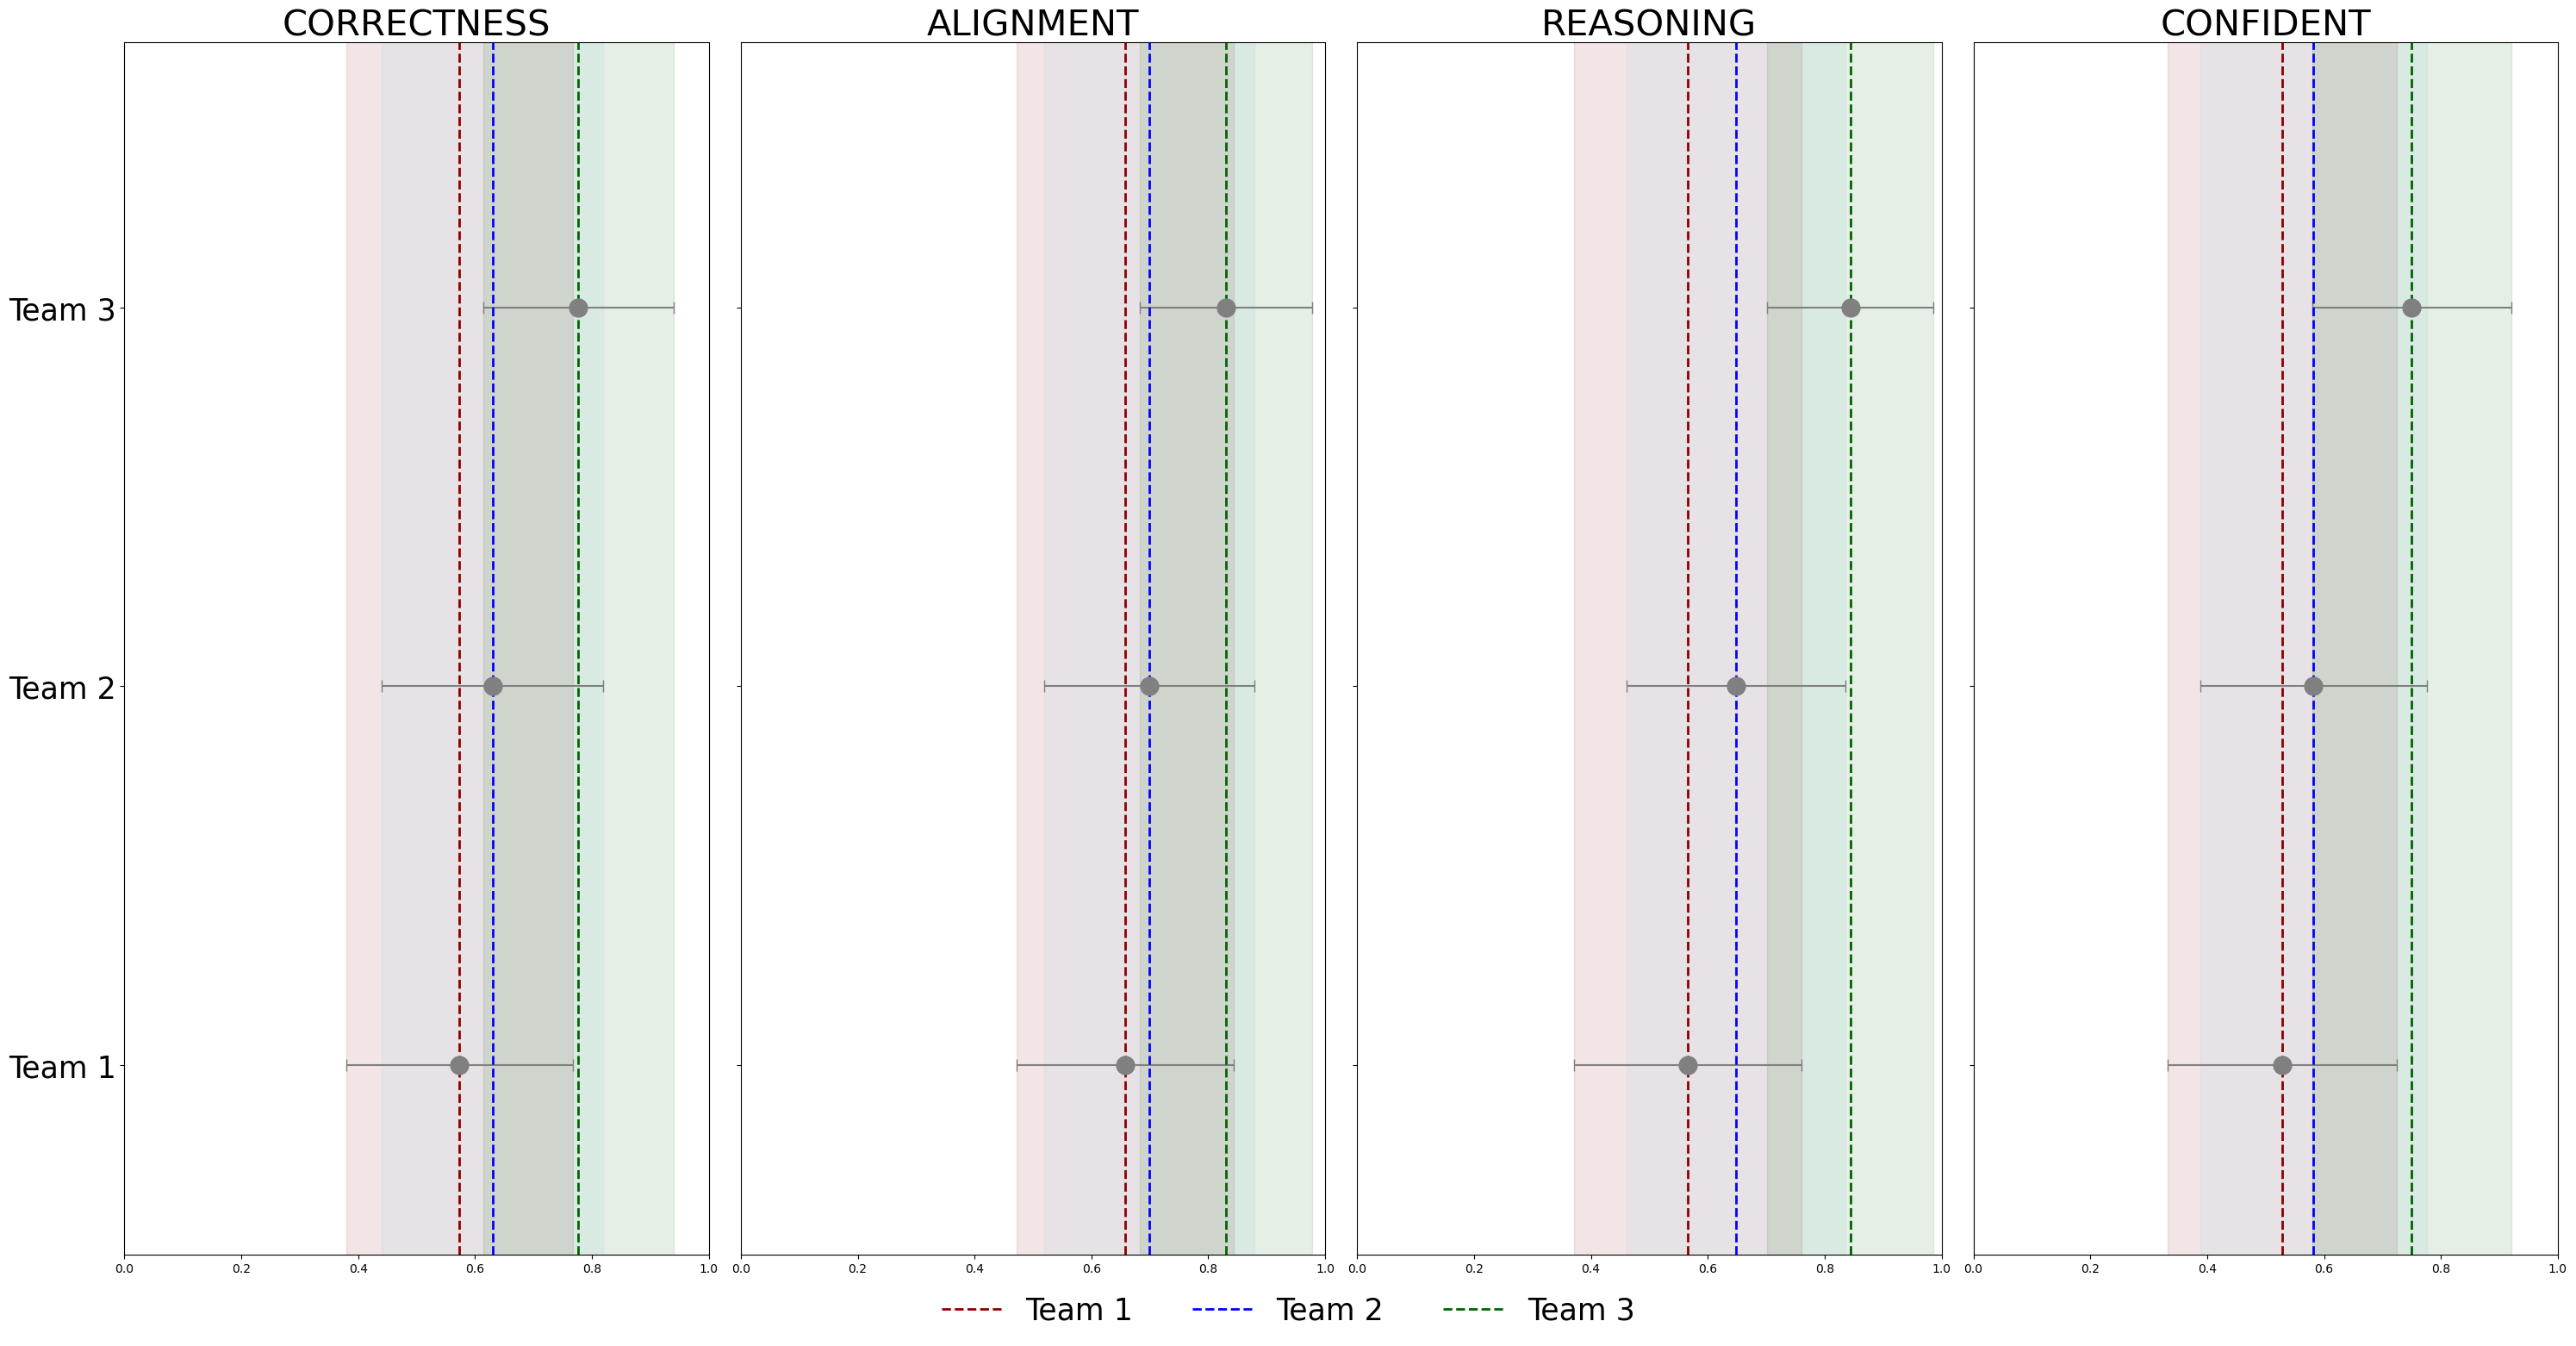

In [40]:
#boxplot x categoria

y2 = np.linspace(-0.7,5.5, 100) 

fig, axes = plt.subplots(1, 4, figsize=(30, 15), sharey=True)


for i, me in enumerate(metrics):
    errors = []
    points = []
    for t in range(1,4):
        mean = round(MM[f'{me}_T{t}'].mean(),3)
        print(mean, me)
        add = 1.96 * np.sqrt(mean*(1-mean)/25)
        print(add)
        low = mean - add
        high = mean + add
        points.append(mean)
        errors.append([[mean - low], [high - mean]])
        err_array = np.array(errors).T.squeeze()
     # Plot su subplot corrente
    #c = ['red', 'blue','green']
    axes[i].errorbar(
            points,
            teams,
            xerr = err_array,
            fmt='o',
            ecolor='gray',
            capsize=5,
            linestyle='None',
            color= 'gray',
            markersize=15
        )
    b1 = points[0] - errors[0][0][0]
    b2 = errors[0][1][0] + points[0]

    b11 = points[1] - errors[1][0][0]
    b22 = errors[1][1][0] + points[1]

    b111 = points[2] - errors[2][0][0]
    b222 = errors[2][1][0] + points[2]
    
    axes[i].axvline(points[0], linewidth=2, color='darkred', linestyle = '--', label = 'Team 1')
    axes[i].axvline(points[1], linewidth=2, color='blue', linestyle = '--', label = 'Team 2')
    axes[i].axvline(points[2], linewidth=2, color='darkgreen', linestyle = '--', label = 'Team 3')
    #axes[i].axvline(metriche_h[i], linewidth=3, color='pink', linestyle = '--', label = 'Human')
    axes[i].set_xlim([0,1])
    axes[i].set_ylim([-0.5,2.7])
    axes[i].fill_betweenx(y2, b1 , b2 , color ='darkred',  alpha=0.1 )
    axes[i].fill_betweenx(y2, b11 , b22, color ='skyblue',  alpha=0.1 )
    axes[i].fill_betweenx(y2, b111 , b222, color ='darkgreen',  alpha=0.1 )
    axes[i].set_yticks(teams)
    axes[i].set_yticklabels(teams, fontsize= 25)
    
    axes[i].set_title(f"{metrics[i]}", fontsize=30)
        #axes[i].tick_params(axis='x', rotation=45, labelsize=20)
        #axes[i].tick_params(axis='y', labelsize=22)
        
fig.legend(
    labels = ['Team 1', 'Team 2', 'Team 3'],
    loc='lower center',
    ncol=3,
    fontsize=25,
    framealpha=0.,
    bbox_to_anchor=(0.5, -0.05)  
)
plt.tight_layout()
plt.savefig('Boxplot_metriche_bis.png',bbox_inches="tight")
plt.show()

## 2

In [24]:
teams = ['Team 1', 'Team 2', 'Team 3']
metrics = ['CORRECTNESS', 'ALIGNMENT', 'REASONING', 'CONFIDENCE']
tasks = ['Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5']

In [16]:
#x metriche
x_metriche = datas['CORRECTNESS_T1_1', 'ALIGNMENT_T1_1', 'REASONING_T1_1', 'CONFIDENT_T1_1']
x_metriche = x_metriche.rename({"CORRECTNESS_T1_1" : "CORRECTNESS", "ALIGNMENT_T1_1" : "ALIGNMENT", "REASONING_T1_1" : "REASONING", "CONFIDENT_T1_1" :"CONFIDENCE"})
x_metriche = x_metriche.with_columns((pl.lit(1).alias('TEAM')))
x_metriche = x_metriche.with_columns((pl.lit(1).alias('TASK')))

for i in range(1,6): #per ogni task 
    for t in range(1,4): #per ogni team
        if (i == 1):
            if (t != 3):
                t = t+1
            else:
                continue
        temp = datas[f'CORRECTNESS_T{i}_{t}', f'ALIGNMENT_T{i}_{t}', f'REASONING_T{i}_{t}', f'CONFIDENT_T{i}_{t}']
        temp = temp.rename({f'CORRECTNESS_T{i}_{t}': "CORRECTNESS", f'ALIGNMENT_T{i}_{t}': "ALIGNMENT", f'REASONING_T{i}_{t}': "REASONING", f'CONFIDENT_T{i}_{t}':"CONFIDENCE"})
        temp = temp.with_columns((pl.lit(t).alias('TEAM')))
        temp = temp.with_columns((pl.lit(i).alias('TASK')))
        
        x_metriche = pl.concat([x_metriche, temp])
        
    

In [17]:
x_metriche

CORRECTNESS,ALIGNMENT,REASONING,CONFIDENCE,TEAM,TASK
i64,i64,i64,i64,i32,i32
6,4,2,4,1,1
6,8,7,2,1,1
7,7,6,7,1,1
6,6,7,4,1,1
4,8,5,3,1,1
…,…,…,…,…,…
7,8,8,8,3,5
4,7,7,6,3,5
8,9,9,7,3,5


In [18]:
s_metriche = x_metriche/10

In [19]:
s_metriche= s_metriche.with_columns(
    x_metriche["TEAM"]
)
s_metriche= s_metriche.with_columns(
    x_metriche["TASK"]
)

In [42]:

for i, me in enumerate(metrics):
    for t in range(1,4):
        mean = round(s_metriche.filter(pl.col('TEAM') == t)[me].mean(),3)
        n =  s_metriche.filter(pl.col('TEAM') == t).shape[0]
        add = 1.96 * np.sqrt(mean*(1-mean)/n)
        print('Team',t,'Metrica', me, 'media', mean, 'add', round(add,2))

Team 1 Metrica CORRECTNESS media 0.573 add 0.09
Team 2 Metrica CORRECTNESS media 0.63 add 0.08
Team 3 Metrica CORRECTNESS media 0.777 add 0.07
Team 1 Metrica ALIGNMENT media 0.658 add 0.08
Team 2 Metrica ALIGNMENT media 0.699 add 0.08
Team 3 Metrica ALIGNMENT media 0.83 add 0.07
Team 1 Metrica REASONING media 0.566 add 0.09
Team 2 Metrica REASONING media 0.648 add 0.08
Team 3 Metrica REASONING media 0.844 add 0.06
Team 1 Metrica CONFIDENCE media 0.528 add 0.09
Team 2 Metrica CONFIDENCE media 0.582 add 0.09
Team 3 Metrica CONFIDENCE media 0.75 add 0.08


In [28]:
for i, ta in enumerate(tasks): #per ogni task

    for t in range(1,4):  #per ogni team
        num = 0
        for me in metrics:
            task = i+1
            a = round(s_metriche.filter((pl.col('TASK') == task) & (pl.col('TEAM') == t))[me].mean(),3)
            num = num + a
        mean = round(num,3)/4
        print('Team',t,'Task', ta, 'media', mean)        

    

Team 1 Task Task 1 media 0.601
Team 2 Task Task 1 media 0.66
Team 3 Task Task 1 media 0.875
Team 1 Task Task 2 media 0.537
Team 2 Task Task 2 media 0.583
Team 3 Task Task 2 media 0.751
Team 1 Task Task 3 media 0.567
Team 2 Task Task 3 media 0.606
Team 3 Task Task 3 media 0.802
Team 1 Task Task 4 media 0.592
Team 2 Task Task 4 media 0.703
Team 3 Task Task 4 media 0.811
Team 1 Task Task 5 media 0.609
Team 2 Task Task 5 media 0.648
Team 3 Task Task 5 media 0.761


### Boxplot x Metrica


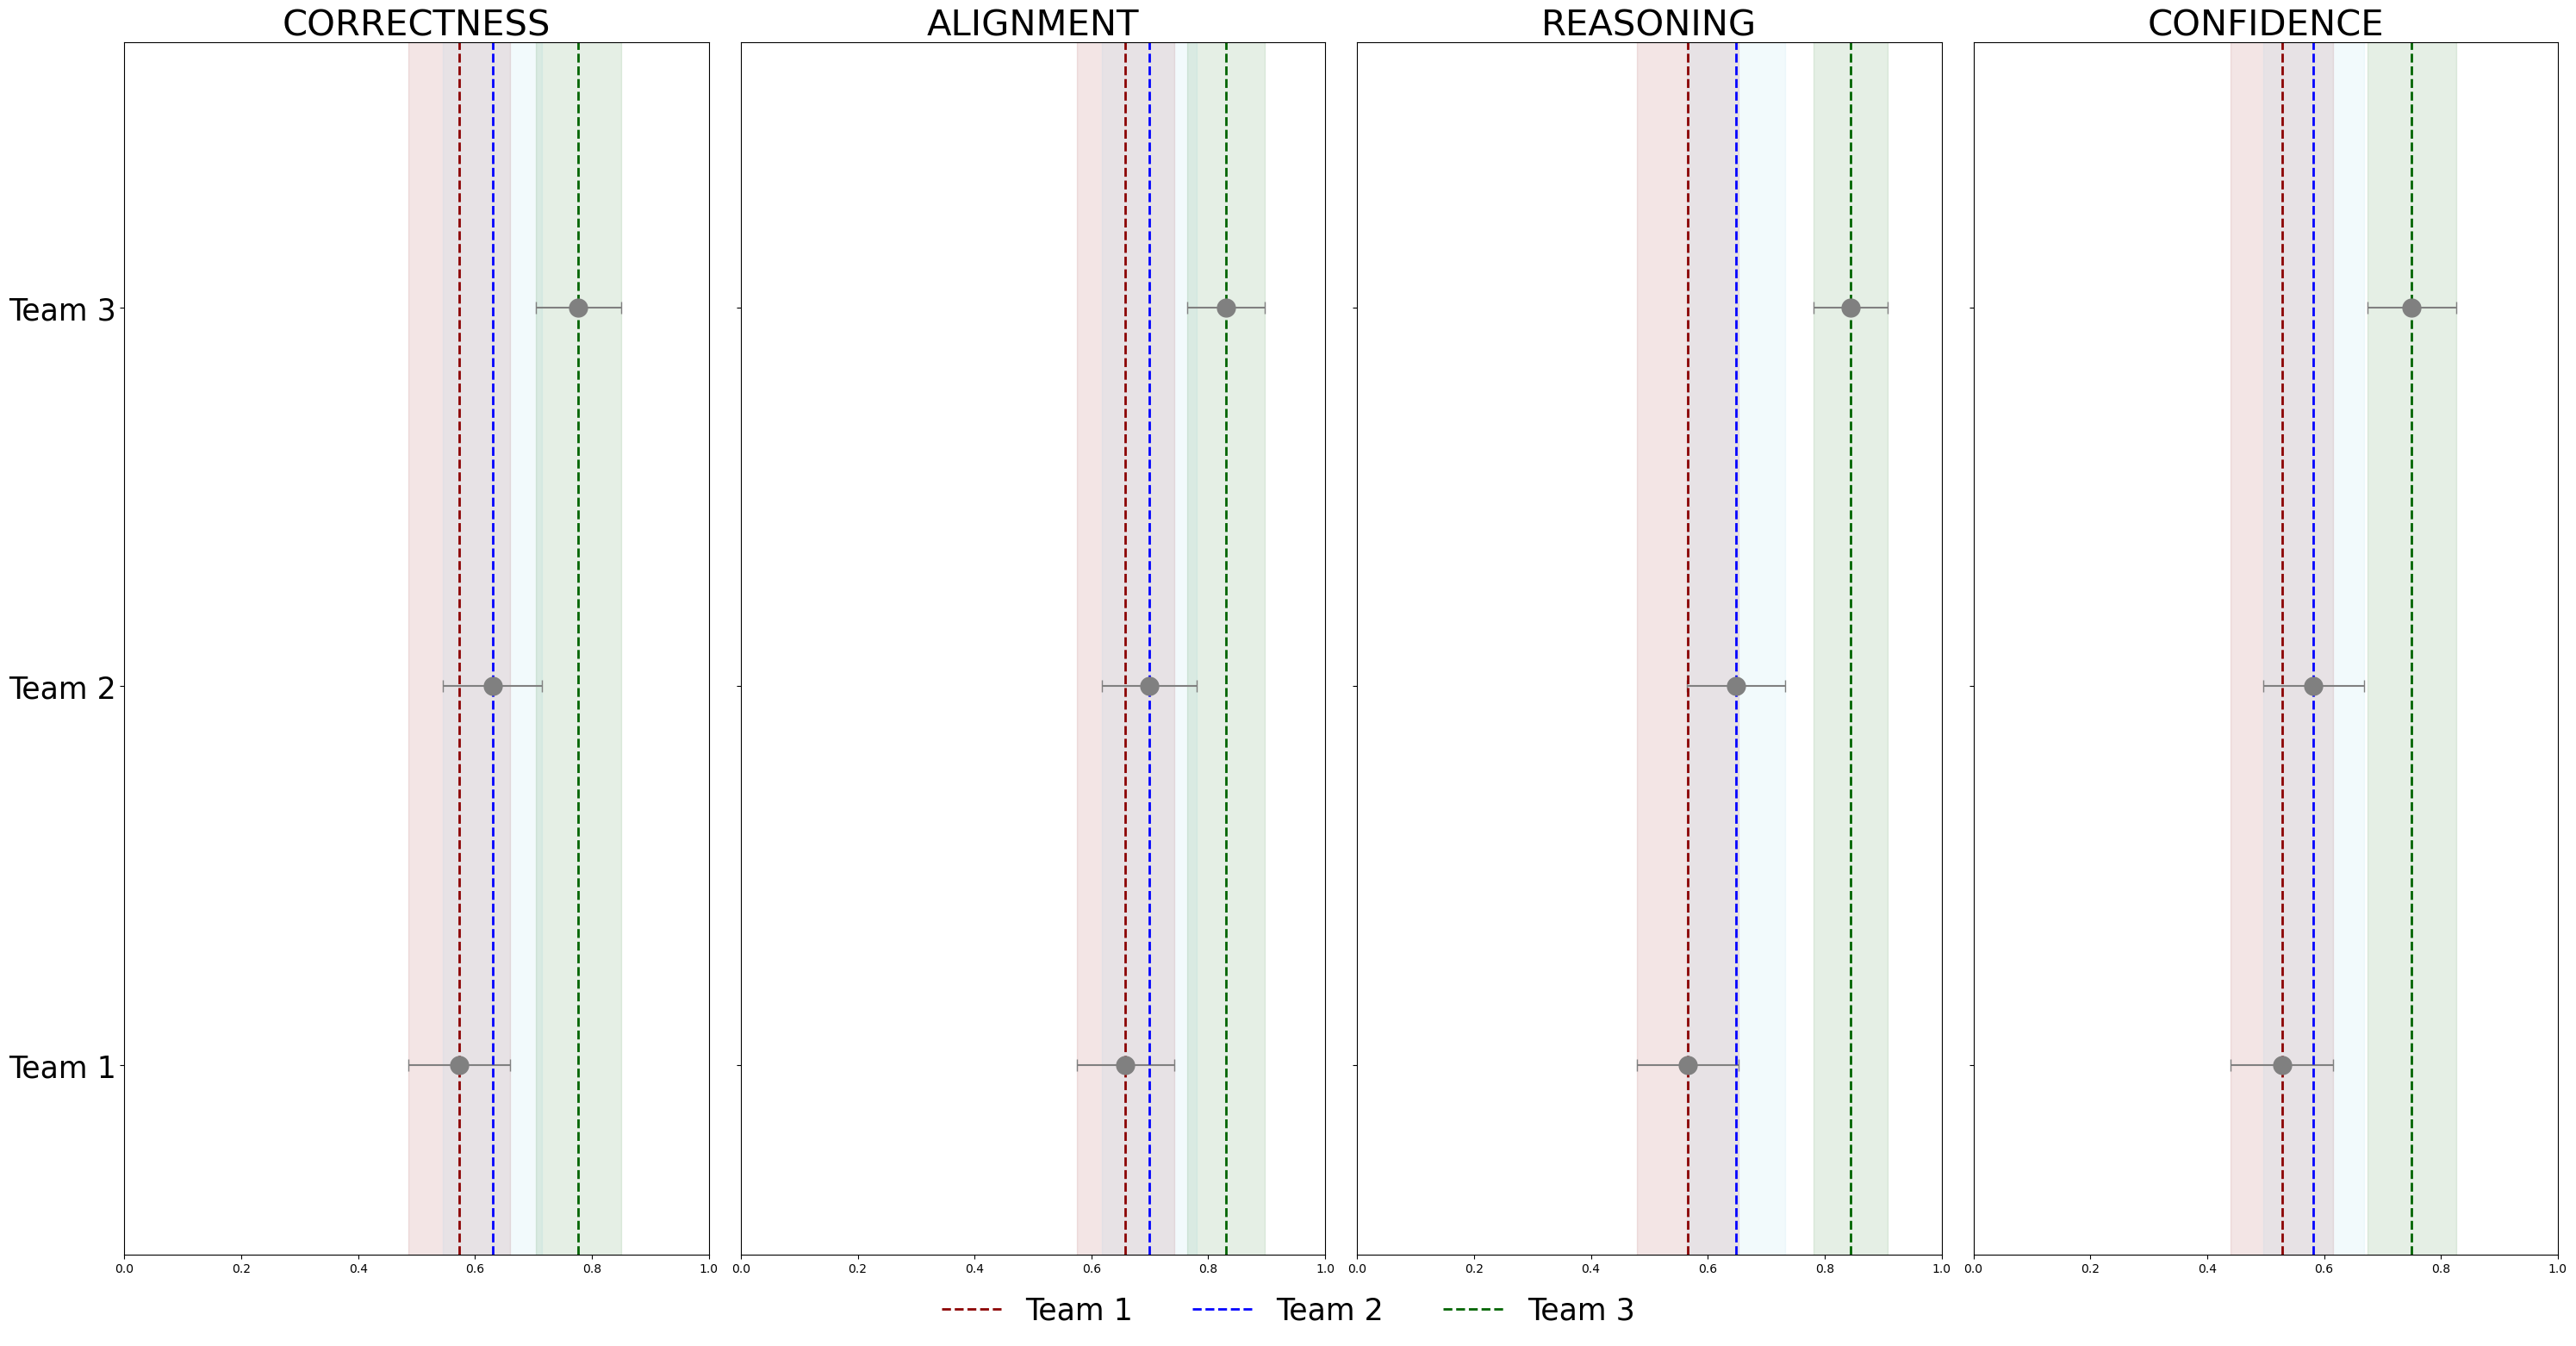

In [31]:
#boxplot x categoria

y2 = np.linspace(-0.7,5.5, 100) 

fig, axes = plt.subplots(1, 4, figsize=(30, 15), sharey=True)


for i, me in enumerate(metrics):
    errors = []
    points = []
    for t in range(1,4):
        mean = round(s_metriche.filter(pl.col('TEAM') == t)[me].mean(),3)
        n =  s_metriche.filter(pl.col('TEAM') == t).shape[0]
        add = 1.96 * np.sqrt(mean*(1-mean)/n)
        low = mean - add
        high = mean + add
        points.append(mean)
        errors.append([[mean - low], [high - mean]])
        err_array = np.array(errors).T.squeeze()
     # Plot su subplot corrente
    #c = ['red', 'blue','green']
    axes[i].errorbar(
            points,
            teams,
            xerr = err_array,
            fmt='o',
            ecolor='gray',
            capsize=5,
            linestyle='None',
            color= 'gray',
            markersize=15
        )
    b1 = points[0] - errors[0][0][0]
    b2 = errors[0][1][0] + points[0]

    b11 = points[1] - errors[1][0][0]
    b22 = errors[1][1][0] + points[1]

    b111 = points[2] - errors[2][0][0]
    b222 = errors[2][1][0] + points[2]
    
    axes[i].axvline(points[0], linewidth=2, color='darkred', linestyle = '--', label = 'Team 1')
    axes[i].axvline(points[1], linewidth=2, color='blue', linestyle = '--', label = 'Team 2')
    axes[i].axvline(points[2], linewidth=2, color='darkgreen', linestyle = '--', label = 'Team 3')
    #axes[i].axvline(metriche_h[i], linewidth=3, color='pink', linestyle = '--', label = 'Human')
    axes[i].set_xlim([0,1])
    axes[i].set_ylim([-0.5,2.7])
    axes[i].fill_betweenx(y2, b1 , b2 , color ='darkred',  alpha=0.1 )
    axes[i].fill_betweenx(y2, b11 , b22, color ='skyblue',  alpha=0.1 )
    axes[i].fill_betweenx(y2, b111 , b222, color ='darkgreen',  alpha=0.1 )
    axes[i].set_yticks(teams)
    axes[i].set_yticklabels(teams, fontsize= 25)
    
    axes[i].set_title(f"{metrics[i]}", fontsize=30)
        #axes[i].tick_params(axis='x', rotation=45, labelsize=20)
        #axes[i].tick_params(axis='y', labelsize=22)
        
fig.legend(
    labels = ['Team 1', 'Team 2', 'Team 3'],
    loc='lower center',
    ncol=3,
    fontsize=25,
    framealpha=0.,
    bbox_to_anchor=(0.5, -0.05)  
)
plt.tight_layout()
plt.savefig('Boxplot_metriche.png',bbox_inches="tight")
plt.show()



**Kruskal**

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.

In [57]:
# Kruscal

for i in metrics:
    x1 = s_metriche.filter(pl.col('TEAM') == 1)[f'{i}']
    x2 = s_metriche.filter(pl.col('TEAM') == 2)[f'{i}']
    x3 = s_metriche.filter(pl.col('TEAM') == 3)[f'{i}']
    print(f'Test di Kruskal sulla {i} è pari a {kruskal(x1, x2, x3)}')

Test di Kruskal sulla CORRECTNESS è pari a KruskalResult(statistic=81.3454677652713, pvalue=2.167984190307404e-18)
Test di Kruskal sulla ALIGNMENT è pari a KruskalResult(statistic=70.13104758402638, pvalue=5.90522584837919e-16)
Test di Kruskal sulla REASONING è pari a KruskalResult(statistic=134.53406349325866, pvalue=6.113632068860079e-30)
Test di Kruskal sulla CONFIDENCE è pari a KruskalResult(statistic=64.55585038595656, pvalue=9.591249783455167e-15)


In [46]:
for i in metrics:
    x1 = s_metriche.filter(pl.col('TEAM') == 1)[f'{i}']
    x2 = s_metriche.filter(pl.col('TEAM') == 2)[f'{i}']
    x3 = s_metriche.filter(pl.col('TEAM') == 3)[f'{i}']
    print(f'Test di Kruskal sulla {i} di T1 e T2 è pari a {kruskal(x1, x2)}')
    print(f'Test di Kruskal sulla {i} di T1 e T3 è pari a {kruskal(x1, x3)}')
    print(f'Test di Kruskal sulla {i} di T3 e T2 è pari a {kruskal(x3, x2)}')

Test di Kruskal sulla CORRECTNESS di T1 e T2 è pari a KruskalResult(statistic=5.3669355583407965, pvalue=0.02052200126021492)
Test di Kruskal sulla CORRECTNESS di T1 e T3 è pari a KruskalResult(statistic=75.45609148758494, pvalue=3.7362378758766294e-18)
Test di Kruskal sulla CORRECTNESS di T3 e T2 è pari a KruskalResult(statistic=41.237236793905325, pvalue=1.348293604720353e-10)
Test di Kruskal sulla ALIGNMENT di T1 e T2 è pari a KruskalResult(statistic=4.313595363920452, pvalue=0.03780897289357534)
Test di Kruskal sulla ALIGNMENT di T1 e T3 è pari a KruskalResult(statistic=63.83998902677306, pvalue=1.3494635511013553e-15)
Test di Kruskal sulla ALIGNMENT di T3 e T2 è pari a KruskalResult(statistic=37.15043250575712, pvalue=1.0935848886920388e-09)
Test di Kruskal sulla REASONING di T1 e T2 è pari a KruskalResult(statistic=12.535779881768836, pvalue=0.00039923294766373065)
Test di Kruskal sulla REASONING di T1 e T3 è pari a KruskalResult(statistic=117.8496070415649, pvalue=1.870462063280

**Mann-Whitney**

The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions.

In [55]:

#mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto', *, nan_policy='propagate', keepdims=False)[source]
p = []
for i in metrics:
    x1 = s_metriche.filter(pl.col('TEAM') == 1)[f'{i}']
    x2 = s_metriche.filter(pl.col('TEAM') == 2)[f'{i}']
    x3 = s_metriche.filter(pl.col('TEAM') == 3)[f'{i}']
    s12, p1 = mannwhitneyu(x1, x2)
    s13, p2 = mannwhitneyu(x1, x3)
    s23, p3 = mannwhitneyu(x3, x2)
    p.append(p1)
    p.append(p2)
    p.append(p3)
    print(f'Test di Wilcoxon sulla {i} tra team 1 e 2 è pari a {mannwhitneyu(x1, x2)}')
    print(f'Test di Wilcoxon sulla {i} tra team 1 e 3 è pari a {mannwhitneyu(x1, x3)}')
    print(f'Test di Wilcoxon sulla {i} tra team 3 e 2 è pari a {mannwhitneyu(x3, x2)}')
p

Test di Wilcoxon sulla CORRECTNESS tra team 1 e 2 è pari a MannwhitneyuResult(statistic=6508.5, pvalue=0.020570477318288274)
Test di Wilcoxon sulla CORRECTNESS tra team 1 e 3 è pari a MannwhitneyuResult(statistic=2914.0, pvalue=3.765498629157031e-18)
Test di Wilcoxon sulla CORRECTNESS tra team 3 e 2 è pari a MannwhitneyuResult(statistic=11424.0, pvalue=1.3561922987459332e-10)
Test di Wilcoxon sulla ALIGNMENT tra team 1 e 2 è pari a MannwhitneyuResult(statistic=6646.0, pvalue=0.03789122768228505)
Test di Wilcoxon sulla ALIGNMENT tra team 1 e 3 è pari a MannwhitneyuResult(statistic=3319.5, pvalue=1.3592311118906576e-15)
Test di Wilcoxon sulla ALIGNMENT tra team 3 e 2 è pari a MannwhitneyuResult(statistic=11231.0, pvalue=1.0996960380300826e-09)
Test di Wilcoxon sulla REASONING tra team 1 e 2 è pari a MannwhitneyuResult(statistic=5814.5, pvalue=0.00040057559383022796)
Test di Wilcoxon sulla REASONING tra team 1 e 3 è pari a MannwhitneyuResult(statistic=1676.0, pvalue=1.88866004042565e-27)


[0.020570477318288274,
 3.765498629157031e-18,
 1.3561922987459332e-10,
 0.03789122768228505,
 1.3592311118906576e-15,
 1.0996960380300826e-09,
 0.00040057559383022796,
 1.88866004042565e-27,
 1.7320659045846794e-17,
 0.042113013384951783,
 2.7602238450178554e-14,
 3.4711365664718463e-09]

In [71]:
l = false_discovery_control(p, axis=0, method='by')
for i in l:
    print(round(i,4))

0.0766
0.0
0.0
0.1283
0.0
0.0
0.0017
0.0
0.0
0.1307
0.0
0.0


### Boxplot x Task

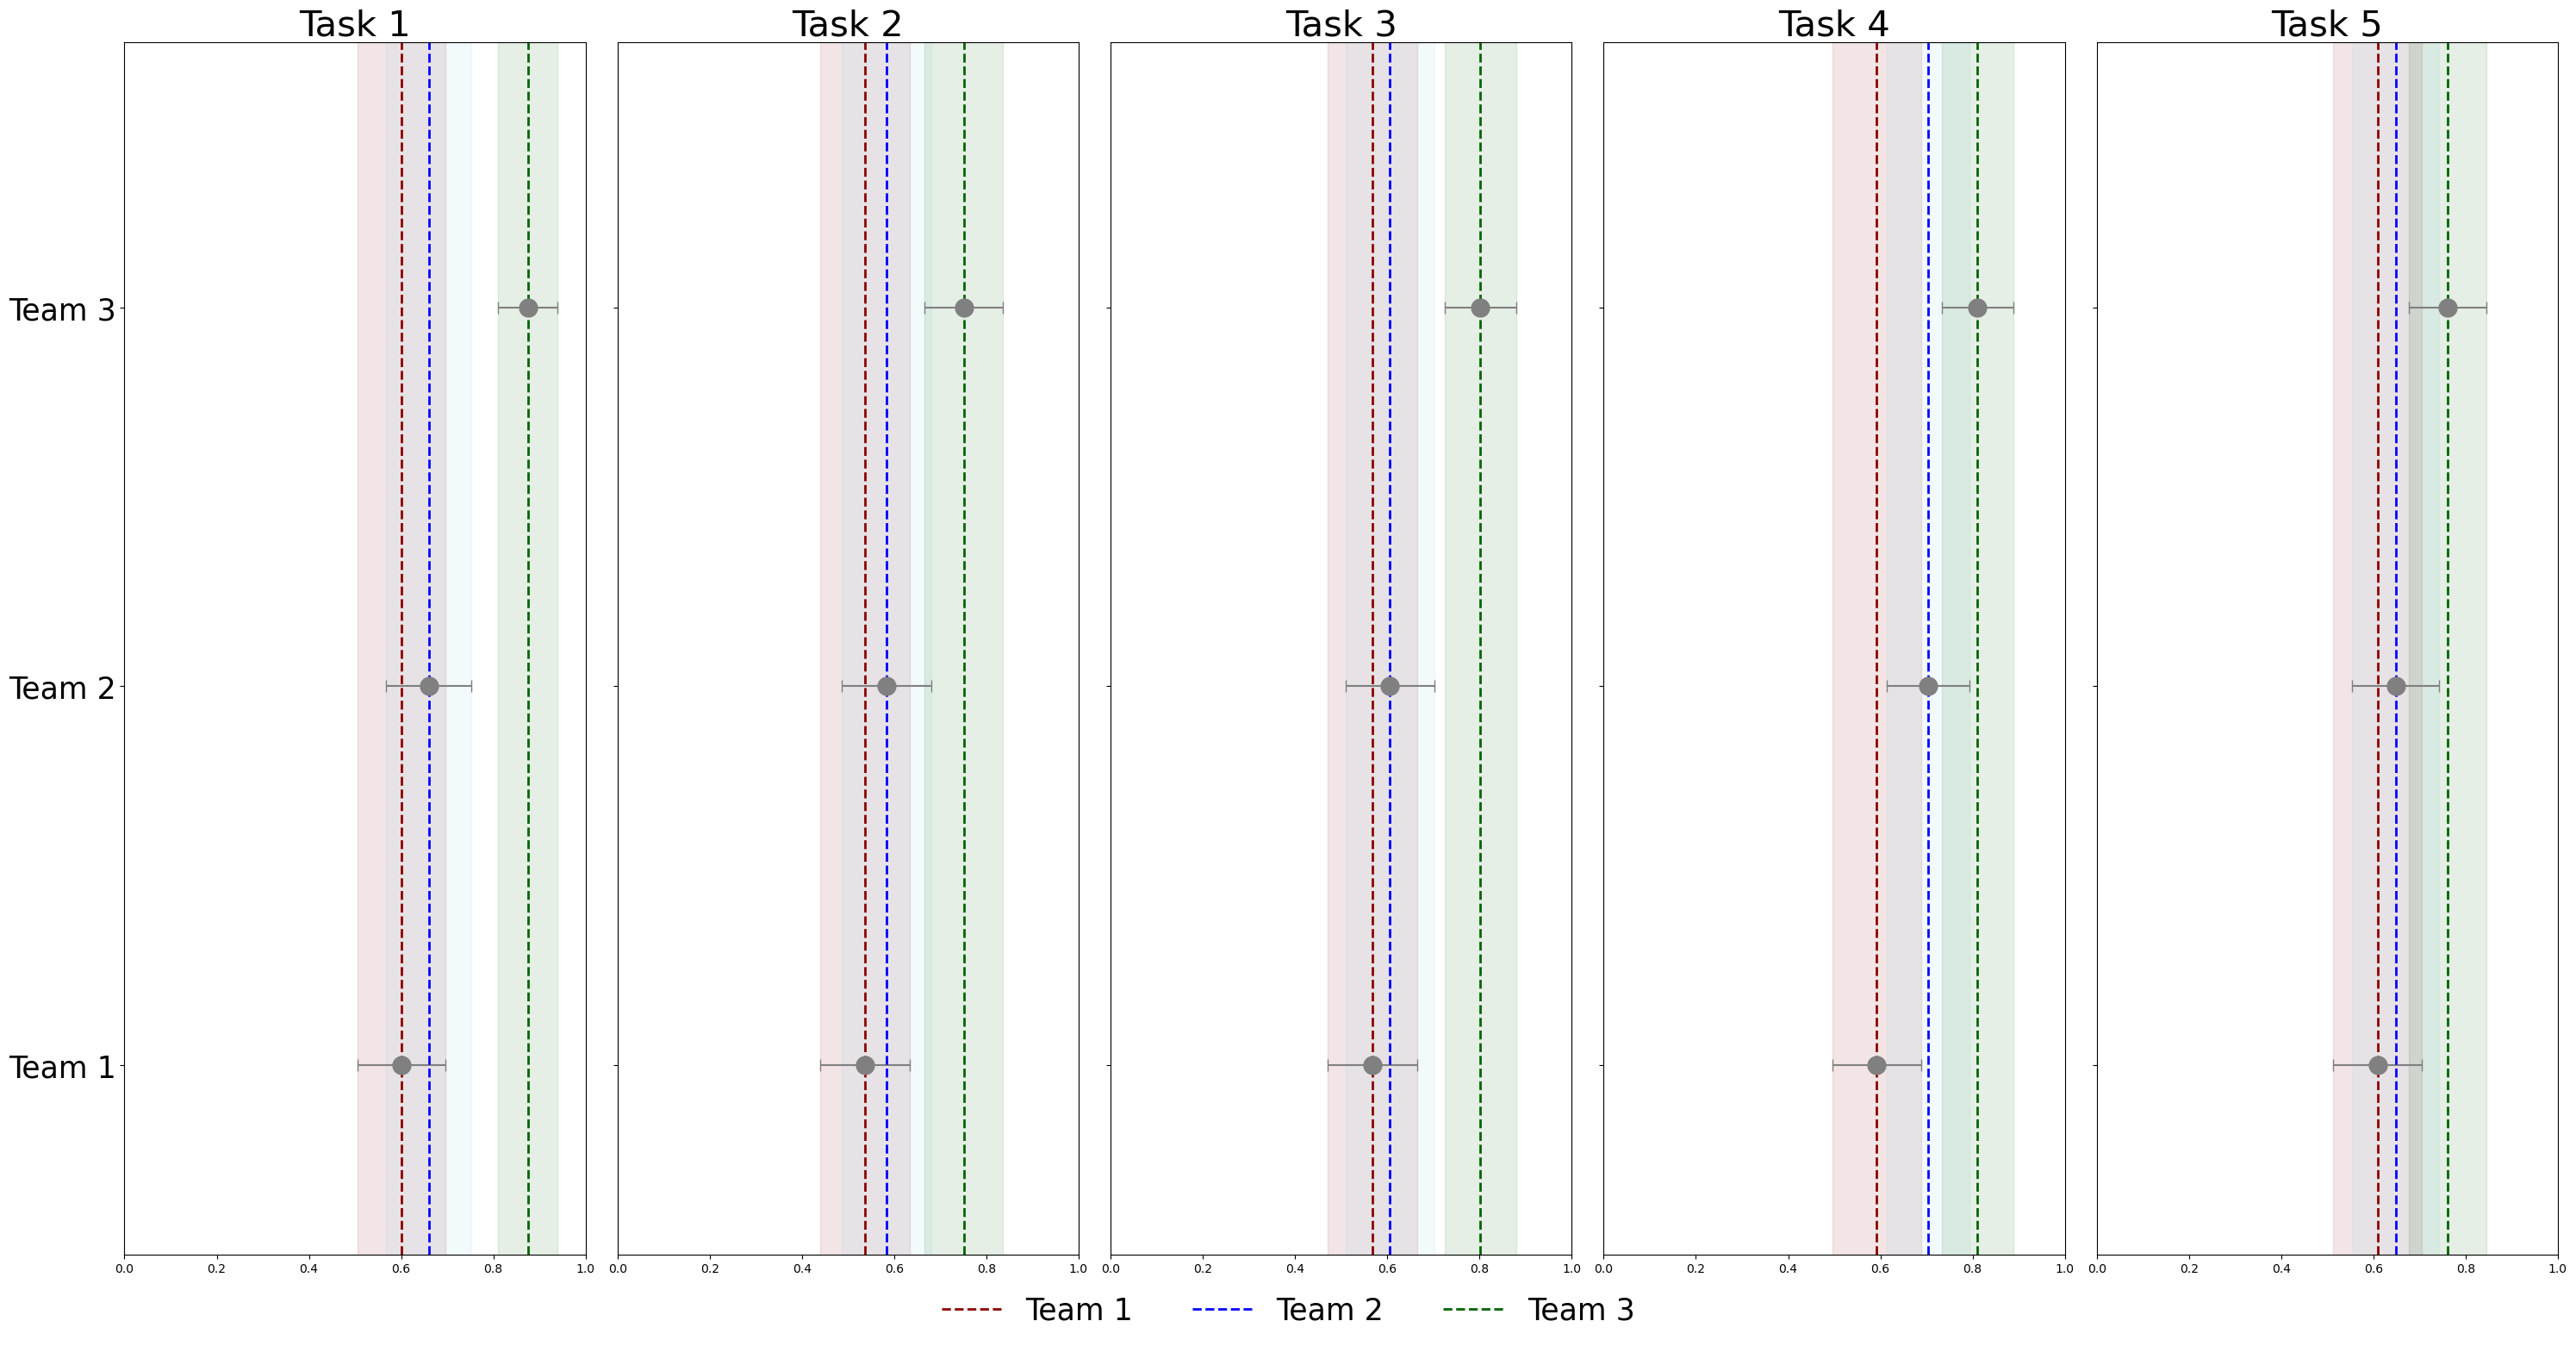

In [58]:
#boxplot x categoria
teams = ['Team 1', 'Team 2', 'Team 3']
metrics = ['CORRECTNESS', 'ALIGNMENT', 'REASONING', 'CONFIDENCE']
tasks = ['Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5']
y2 = np.linspace(-0.7,5.5, 100) 

fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharey=True)


for i, ta in enumerate(tasks): #per ogni task
    errors = []
    points = []
    for t in range(1,4):  #per ogni team
        num = 0
        for me in metrics:
            task = i+1
            a = round(s_metriche.filter((pl.col('TASK') == task) & (pl.col('TEAM') == t))[me].mean(),3)
            num = num + a
        mean = num/4
        n = s_metriche.filter((pl.col('TEAM') == t) & (pl.col('TASK') == task)).shape[0] *4
        add = 1.96 * np.sqrt(mean*(1-mean)/n)
        low = mean - add
        high = mean + add
        points.append(mean)
        errors.append([[mean - low], [high - mean]])
        err_array = np.array(errors).T.squeeze()
     # Plot su subplot corrente
    #c = ['red', 'blue','green']
    axes[i].errorbar(
            points,
            teams,
            xerr = err_array,
            fmt='o',
            ecolor='gray',
            capsize=5,
            linestyle='None',
            color= 'gray',
            markersize=15
        )
    b1 = points[0] - errors[0][0][0]
    b2 = errors[0][1][0] + points[0]

    b11 = points[1] - errors[1][0][0]
    b22 = errors[1][1][0] + points[1]

    b111 = points[2] - errors[2][0][0]
    b222 = errors[2][1][0] + points[2]
    
    axes[i].axvline(points[0], linewidth=2, color='darkred', linestyle = '--', label = 'Team 1')
    axes[i].axvline(points[1], linewidth=2, color='blue', linestyle = '--', label = 'Team 2')
    axes[i].axvline(points[2], linewidth=2, color='darkgreen', linestyle = '--', label = 'Team 3')
    #axes[i].axvline(metriche_h[i], linewidth=3, color='pink', linestyle = '--', label = 'Human')
    axes[i].set_xlim([0,1])
    axes[i].set_ylim([-0.5,2.7])
    axes[i].fill_betweenx(y2, b1 , b2 , color ='darkred',  alpha=0.1 )
    axes[i].fill_betweenx(y2, b11 , b22, color ='skyblue',  alpha=0.1 )
    axes[i].fill_betweenx(y2, b111 , b222, color ='darkgreen',  alpha=0.1 )
    axes[i].set_yticks(teams)
    axes[i].set_yticklabels(teams, fontsize= 25)
    
    axes[i].set_title(f"{tasks[i]}", fontsize=30)
        #axes[i].tick_params(axis='x', rotation=45, labelsize=20)
        #axes[i].tick_params(axis='y', labelsize=22)
        
fig.legend(
    labels = ['Team 1', 'Team 2', 'Team 3'],
    loc='lower center',
    ncol=3,
    fontsize=25,
    framealpha=0.,
    bbox_to_anchor=(0.5, -0.05)  
)
plt.tight_layout()
plt.savefig('Boxplot_task.png',bbox_inches="tight")
plt.show()



In [81]:
# Kruscal
for i, ta in enumerate(tasks):
    i = i+1
    x1 = s_metriche.filter((pl.col('TEAM') == 1) & (pl.col('TASK') == i))[metrics]
    x2 = s_metriche.filter((pl.col('TEAM') ==2 ) & (pl.col('TASK') == i))[metrics]
    x3 = s_metriche.filter((pl.col('TEAM') == 3)& (pl.col('TASK') == i))[metrics]
    print(f'Test di Kruskal sulla {i} è pari a {kruskal(x1, x2, x3)}')

Test di Kruskal sulla 1 è pari a KruskalResult(statistic=array([29.94016834, 24.19323091, 34.48561831, 16.71303435]), pvalue=array([3.15191902e-07, 5.57836153e-06, 3.24745492e-08, 2.34860890e-04]))
Test di Kruskal sulla 2 è pari a KruskalResult(statistic=array([12.51336513, 10.5140601 , 26.59890555, 11.35777991]), pvalue=array([1.91759676e-03, 5.21075744e-03, 1.67540978e-06, 3.41734975e-03]))
Test di Kruskal sulla 3 è pari a KruskalResult(statistic=array([18.82771039, 20.42633631, 32.37500811, 17.73119127]), pvalue=array([8.15858110e-05, 3.66840627e-05, 9.32945584e-08, 1.41162953e-04]))
Test di Kruskal sulla 4 è pari a KruskalResult(statistic=array([17.18267095, 14.45131134, 30.30312842, 14.31023664]), pvalue=array([1.85707914e-04, 7.27675269e-04, 2.62881044e-07, 7.80857158e-04]))
Test di Kruskal sulla 5 è pari a KruskalResult(statistic=array([ 8.4687167 ,  7.58779767, 18.997884  ,  7.44896758]), pvalue=array([1.44891041e-02, 2.25076768e-02, 7.49310651e-05, 2.41255510e-02]))


In [117]:
#mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto', *, nan_policy='propagate', keepdims=False)[source]
p = []
for i, ta in enumerate(tasks):
    i = i+1
    x1 = s_metriche.filter((pl.col('TEAM') == 1) & (pl.col('TASK') == i))[metrics]
    x2 = s_metriche.filter((pl.col('TEAM') ==2 ) & (pl.col('TASK') == i))[metrics]
    x3 = s_metriche.filter((pl.col('TEAM') == 3)& (pl.col('TASK') == i))[metrics]
    s12, p1 = mannwhitneyu(x1, x2)
    s13, p2 = mannwhitneyu(x1, x3)
    s23, p3 = mannwhitneyu(x3, x2)
    p.append(p1[0])
    p.append(p1[1])
    p.append(p1[2])
    p.append(p1[3])
    p.append(p2[0])
    p.append(p2[1])
    p.append(p2[2])
    p.append(p2[3])
    p.append(p3[0])
    p.append(p3[1])
    p.append(p3[2])
    p.append(p3[3])
    print(f'Test di Mann-whitney  tra team 1 e 2 sul task {i} è pari a {mannwhitneyu(x1, x2)}')
    print(f'Test di Mann-whitney tra team 1 e 3 sul task {i} è pari a {mannwhitneyu(x1, x3)}')
    print(f'Test di Mann-whitney tra team 3 e 2 sul task {i} è pari a {mannwhitneyu(x3, x2)}')
p

Test di Mann-whitney  tra team 1 e 2 sul task 1 è pari a MannwhitneyuResult(statistic=array([258.5, 268.5, 199.5, 283. ]), pvalue=array([0.28992146, 0.39066799, 0.02710923, 0.57009235]))
Test di Mann-whitney tra team 1 e 3 sul task 1 è pari a MannwhitneyuResult(statistic=array([ 55.5,  95. ,  35. , 121. ]), pvalue=array([4.62446387e-07, 1.58210595e-05, 4.62319319e-08, 1.88719132e-04]))
Test di Mann-whitney tra team 3 e 2 sul task 1 è pari a MannwhitneyuResult(statistic=array([528.5, 521. , 522.5, 479. ]), pvalue=array([2.12934915e-05, 3.28428325e-05, 3.07361102e-05, 1.16264725e-03]))
Test di Mann-whitney  tra team 1 e 2 sul task 2 è pari a MannwhitneyuResult(statistic=array([272.5, 284. , 279.5, 285. ]), pvalue=array([0.43726799, 0.57962761, 0.52260128, 0.59538213]))
Test di Mann-whitney tra team 1 e 3 sul task 2 è pari a MannwhitneyuResult(statistic=array([133.5, 154. ,  63. , 143.5]), pvalue=array([4.41603513e-04, 1.72322743e-03, 1.06181751e-06, 9.30514377e-04]))
Test di Mann-whitney

[0.28992146310773026,
 0.3906679916277832,
 0.02710922751429523,
 0.570092352825788,
 4.624463869077574e-07,
 1.582105952668718e-05,
 4.6231931872909805e-08,
 0.0001887191320766934,
 2.1293491497611423e-05,
 3.284283253297372e-05,
 3.073611024374294e-05,
 0.0011626472467190345,
 0.4372679920346165,
 0.5796276080245555,
 0.522601280618215,
 0.5953821288504759,
 0.0004416035125978117,
 0.0017232274328730975,
 1.0618175092440857e-06,
 0.000930514377471606,
 0.017165678983243487,
 0.018358069448820107,
 8.202953179660745e-05,
 0.0173061277938994,
 0.22493149156683323,
 0.5323531511455185,
 0.8899684474242935,
 0.8596965033420174,
 4.29832392781359e-05,
 4.106023642697308e-05,
 9.64308866967215e-07,
 0.00042563471377375347,
 0.001658879755746165,
 0.0002738091408978112,
 8.645932089892446e-07,
 0.00018499431765464,
 0.048177043695983614,
 0.2216090736260361,
 0.000581731010304679,
 0.036888194695924276,
 3.947146748603424e-05,
 0.00018374101769093903,
 3.5030496044908067e-07,
 0.00029205644

In [113]:
l = false_discovery_control(p, axis=0, method='by')
for i in l:
    print(round(i,10))

1.0
1.0
0.2003173765
1.0
4.32838e-05
0.0006346329
1.29816e-05
0.0029439369
0.0007473809
0.0009222012
0.0009222012
0.0125562426
1.0
1.0
1.0
1.0
0.0056363106
0.0172810309
4.96917e-05
0.0104512481
0.1362689207
0.1393190044
0.0016452325
0.1362689207
1.0
1.0
1.0
1.0
0.0009284123
0.0009284123
4.96917e-05
0.0056363106
0.0172518718
0.0040464988
4.96917e-05
0.0029439369
0.3299448606
1.0
0.0068060644
0.2589479564
0.0009284123
0.0029439369
4.32838e-05
0.004100359
0.2124310573
0.1174072604
0.0534672995
0.330536878
1.0
1.0
1.0
1.0
0.080403504
0.0613261067
0.0017875815
0.0825781606
0.1362689207
0.7124058408
0.0058203165
0.5021228429


## Teams

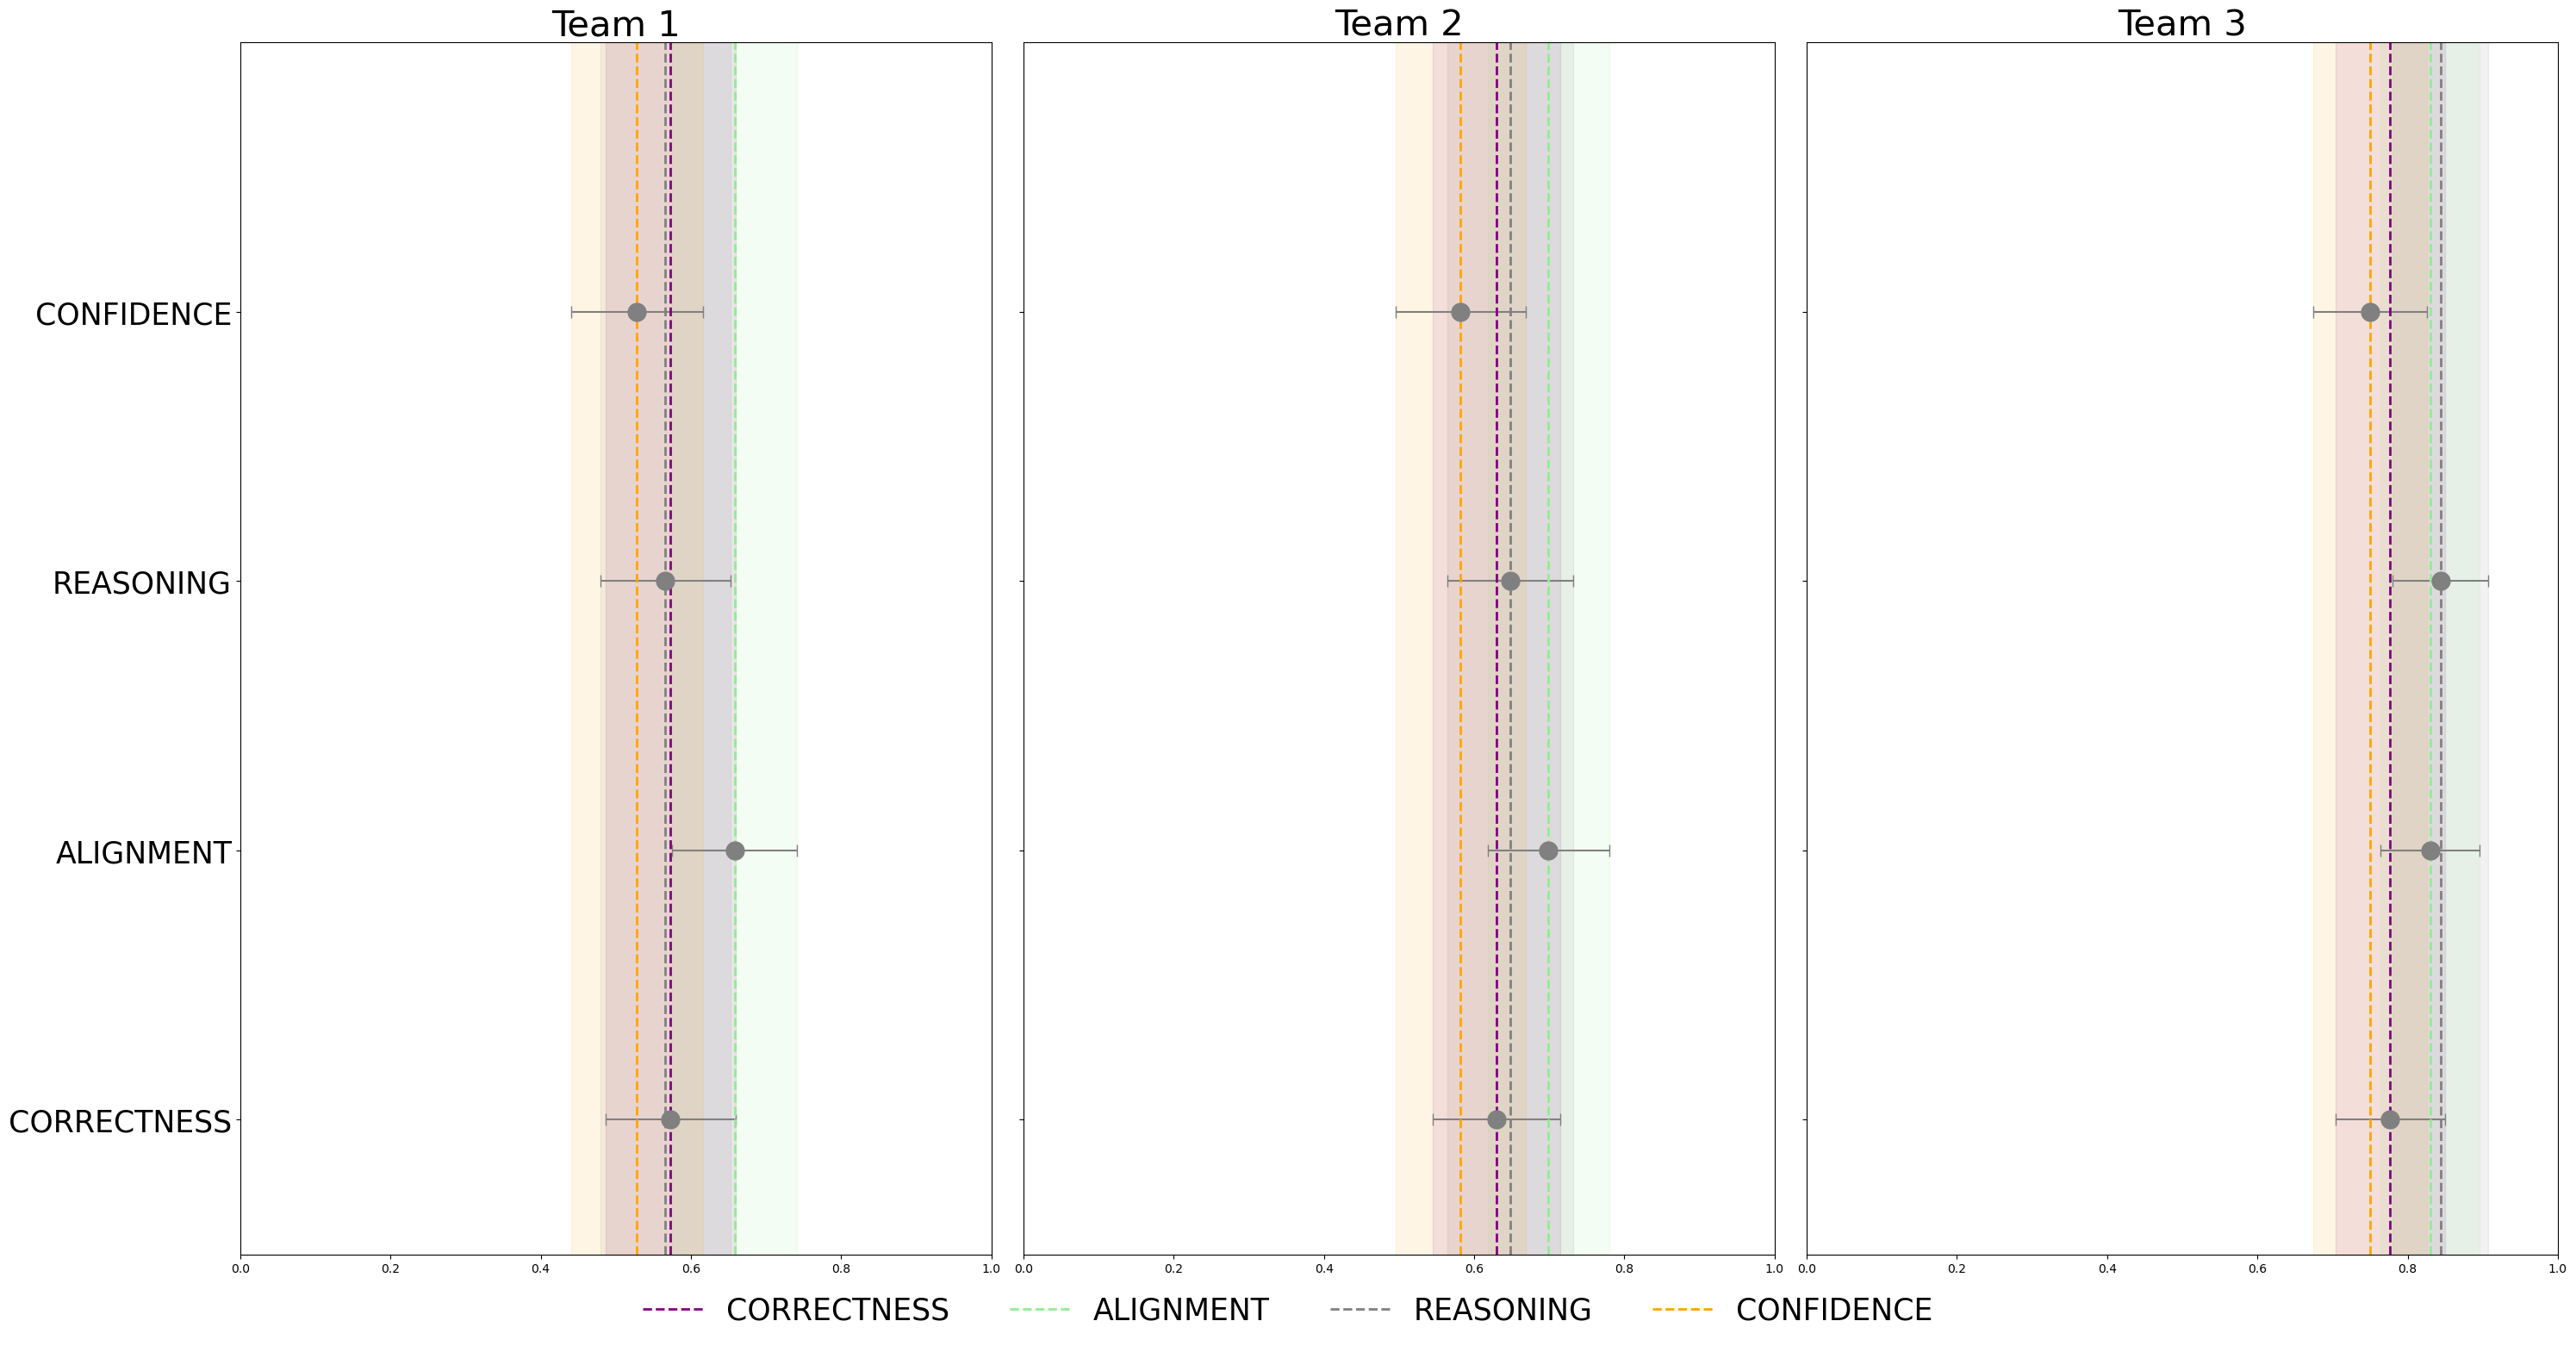

In [60]:
#boxplot x categoria

y2 = np.linspace(-0.7,7, 100) 

fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharey=True)

i = 0
for t in range(1,4): #per ogni team
    errors = []
    points = []
    met = s_metriche.filter(pl.col('TEAM') == t)
    for me in metrics:  #per ogni metrica
        mean = round(met[me].mean(),3)
        n = met.shape[0]
        add = 1.96 * np.sqrt(mean*(1-mean)/n)
        low = mean - add
        high = mean + add
        points.append(mean)
        errors.append([[mean - low], [high - mean]])
        err_array = np.array(errors).T.squeeze()
     # Plot su subplot corrente
    
    axes[i].errorbar(
            points,
            metrics,
            xerr = err_array,
            fmt='o',
            ecolor='gray',
            capsize=5,
            linestyle='None',
            color= 'gray',
            markersize=15
        )
    b1 = points[0] - errors[0][0][0]
    b2 = errors[0][1][0] + points[0]

    b11 = points[1] - errors[1][0][0]
    b22 = errors[1][1][0] + points[1]

    b111 = points[2] - errors[2][0][0]
    b222 = errors[2][1][0] + points[2]

    b1111 = points[3] - errors[3][0][0]
    b2222 = errors[3][1][0] + points[3]
    
    axes[i].axvline(points[0], linewidth=2, color='purple', linestyle = '--', label = 'CORRECTNESS')
    axes[i].axvline(points[1], linewidth=2, color='lightgreen', linestyle = '--', label = 'ALIGNMENT')
    axes[i].axvline(points[2], linewidth=2, color='gray', linestyle = '--', label = 'REASONING')
    axes[i].axvline(points[3], linewidth=2, color='orange', linestyle = '--', label = 'CONFIDENCE')
    axes[i].set_xlim([0,1])
    axes[i].set_ylim([-0.5,4])
    axes[i].fill_betweenx(y2, b1 , b2 , color ='purple',  alpha=0.1 )
    axes[i].fill_betweenx(y2, b11 , b22, color ='lightgreen',  alpha=0.1 )
    axes[i].fill_betweenx(y2, b111 , b222, color ='gray',  alpha=0.1 )
    axes[i].fill_betweenx(y2, b1111 , b2222 , color ='orange',  alpha=0.1 )
    axes[i].set_yticks(metrics)
    axes[i].set_yticklabels(metrics, fontsize= 25)
    
    axes[i].set_title(f"{teams[i]}", fontsize=30)
        
    i = i+1
        
fig.legend(
    labels = ['CORRECTNESS', 'ALIGNMENT', 'REASONING', 'CONFIDENCE'],
    loc='lower center',
    ncol=4,
    fontsize=25,
    framealpha=0.,
    bbox_to_anchor=(0.5, -0.05)  
    
)
plt.tight_layout()
plt.savefig('Boxplot_teams.png', bbox_inches="tight")
plt.show()

